In [1]:
# Try to use data that has been labeled to "safe", "moderate", "risky" from scenario_analysis.ipynb
# Copied from scenario_analysis.ipynb


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

import os
from pathlib import Path
import numpy as np
import seaborn as sns
# 
# idx = pd.IndexSlice
# 
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# 
# notebook_path = os.path.abspath("0508_experiment.ipynb")
# notebook_dir = os.path.dirname(notebook_path)
# os.chdir(notebook_dir)
# print(os.getcwd())
# 
# def process_df(df):
#     record_df = pd.json_normalize(df['records'])
#     # concatenate records data
#     df = pd.concat([df, record_df],  axis=1)
# 
#     # drop original column
#     df = df.drop('records', axis=1)
# 
#     # drop infractions columns
# 
#     # remove prefixes from column name
#     df.columns = df.columns.str.removeprefix('meta.')
#     df.columns = df.columns.str.removeprefix('scores.')
#     df['driving_score'] = df['score_composed'] / 100
#     df = df.rename(columns={"index": "route_index"})
#     df = df.set_index(['rep', 'fps', 'highquality', 'route_index'])
#     return df
# 
# 
# def make_df(path: str):
#     with open(path, "r") as f:
# 
#         p = Path(path)
# 
#         x = p.stem.split("_")
#         data = {}
#         data['fps'] = int(x[1])
#         data['highquality'] = x[3]
# 
#         rep_no = [x[-1] for x in path.split('/') if 'rep' in x][0]
#         data['rep'] = int(rep_no)
#         content = json.load(f)
#         data['records'] = content['_checkpoint']['records']
# 
#         df = pd.DataFrame(data)
#         return process_df(df)
# from util.load_scenarios import load_scenario_df
# from util.load_evaluations import load_benchmark_df
# 
# eval_df = load_benchmark_df("../data/evaluation/benchmarking/default")
# scenario_df = load_scenario_df("../data/definition/routes_devtest_sliced.xml")
# 
# # join scenario and evaluation data
# df = eval_df.join(scenario_df, on='route_index', how='inner').sort_index()

In [3]:
from notebooks.util.load_scenarios import load_scenario_df
from notebooks.util.load_evaluations import load_benchmark_df

dfs = []
# path = "data/ronin/rep*/*/*.json"
# for file_path in glob.glob(path):
#     # print(file_path)
#     dfs.append(make_df(file_path))

breakpoint()
eval_df = load_benchmark_df("../data/evaluation/benchmarking/default")
scenario_df = load_scenario_df("../data/definition/routes_devtest_sliced.xml")

# join scenario and evaluation data
df = eval_df.join(scenario_df, on='route_index', how='inner').sort_index()

df

# df = pd.concat(dfs).sort_index()
# df = df[['driving_score', 'duration_system']]

route_id                    status  \
fps highquality rep route_index                                                
10  False       0   0              RouteScenario_0  Failed - Agent timed out   
                    1              RouteScenario_1  Failed - Agent timed out   
                    2              RouteScenario_2  Failed - Agent timed out   
                    3              RouteScenario_3  Failed - Agent timed out   
                    4              RouteScenario_4  Failed - Agent timed out   
...                                            ...                       ...   
20  True        9   127          RouteScenario_127                 Completed   
                    128          RouteScenario_128                 Completed   
                    129          RouteScenario_129                 Completed   
                    130          RouteScenario_130                 Completed   
                    131          RouteScenario_131  Failed - Agent timed out   

                                                     infractions.collisions_layout  \
fps highquality rep route_index                                                      
10  False       0   0                                                           []   
                    1                                                           []   
                    2            [Agent collided against object with type=stati...   
                    3                                                           []   
                    4                                                           []   
...                                                                            ...   
20  True        9   127                                                         []   
                    128                                                         []   
                    129                                                         []   
                    130                                                         []   
                    131                                                         []   

                                infractions.collisions_pedestrian  \
fps highquality rep route_index                                     
10  False       0   0                                          []   
                    1                                          []   
                    2                                          []   
                    3                                          []   
                    4                                          []   
...                                                           ...   
20  True        9   127                                        []   
                    128                                        []   
                    129                                        []   
                    130                                        []   
                    131                                        []   

                                                    infractions.collisions_vehicle  \
fps highquality rep route_index                                                      
10  False       0   0            [Agent collided against object with type=vehic...   
                    1            [Agent collided against object with type=vehic...   
                    2                                                           []   
                    3                                                           []   
                    4                                                           []   
...                                                                            ...   
20  True        9   127                                                         []   
                    128                                                         []   
                    129                                                         []   
                    130          [Agen

In [4]:
oracle_df = df.xs((20, "True"), level=[
    'fps', 'highquality'], drop_level=False).sort_index()
oracle_df.info()

# oracle driving score per scenario
oracle_vec = oracle_df.groupby('route_index')['driving_score'].mean()
df['driving_score_error'] = (df['driving_score'] - oracle_vec).abs()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1280 entries, (20, 'True', '0', 0) to (20, 'True', '9', 131)
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   route_id                           1280 non-null   object 
 1   status                             1280 non-null   object 
 2   infractions.collisions_layout      1280 non-null   object 
 3   infractions.collisions_pedestrian  1280 non-null   object 
 4   infractions.collisions_vehicle     1280 non-null   object 
 5   infractions.outside_route_lanes    1280 non-null   object 
 6   infractions.red_light              1280 non-null   object 
 7   infractions.route_dev              1280 non-null   object 
 8   infractions.route_timeout          1280 non-null   object 
 9   infractions.stop_infraction        1280 non-null   object 
 10  infractions.vehicle_blocked        1280 non-null   object 
 11  duration_game      

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = df.xs("True", level="highquality", drop_level=False)


safe_threshold = 0.01
risky_threshold = 0.25

# give each point a label, do not do mean value here
data.loc[:,'label'] = np.select(
    [data['driving_score_error'] < safe_threshold,
     data['driving_score_error'].between(safe_threshold, risky_threshold),
     data['driving_score_error'] > risky_threshold,
     ],
    ['safe', 'moderate', 'risky',],
)

data_numerical = data[[
    "duration_system",
    "driving_score",
    "driving_score_error",
    "dist_len_ratio",
    "max_angles",
    "avg_angles",
    "n_turns",
    "label"
]]

data_numerical_10 = data_numerical.xs(10, level="fps", drop_level=False) # data for 10 fps only
data_numerical_12 = data_numerical.xs(12, level="fps", drop_level=False)
data_numerical_14 = data_numerical.xs(14, level="fps", drop_level=False)
data_numerical_15 = data_numerical.xs(15, level="fps", drop_level=False)
data_numerical_17 = data_numerical.xs(17, level="fps", drop_level=False)
data_numerical_18 = data_numerical.xs(18, level="fps", drop_level=False)
data_numerical_20 = data_numerical.xs(20, level="fps", drop_level=False)

# data_numerical_10_scaled = scaler.fit_transform(data_numerical_10)
# data_10 = np.concatenate(data_numerical_10_scaled, data.xs(10, level='fps', drop_level=False)['label'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
# select columns in df for further analysis
data_numerical_10

duration_system  driving_score  \
fps highquality rep route_index                                   
10  True        0   0                 684.729153       0.292678   
                    1                 640.499605       0.033092   
                    2                 517.392813       0.260151   
                    3                 284.830935       0.434195   
                    4                 458.269412       0.168521   
...                                          ...            ...   
                9   127               511.180476       0.270951   
                    128               554.564775       0.772077   
                    129               481.806731       0.322199   
                    130               511.522681       0.359682   
                    131               226.269769       1.000000   

                                 driving_score_error  dist_len_ratio  \
fps highquality rep route_index                                        
10  True        0   0                       0.392322        0.440128   
                    1                       0.882498        0.269193   
                    2                       0.735559        0.391748   
                    3                       0.565805        0.753167   
                    4                       0.826725        0.077220   
...                                              ...             ...   
                9   127                     0.729049        0.640282   
                    128                     0.227923        0.612656   
                    129                     0.677801        0.807076   
                    130                     0.256318        0.104320   
                    131                     0.034458        0.854928   

                                 max_angles  avg_angles  n_turns     label  
fps highquality rep route_index                                             
10  True        0   0             71.505084   31.445421        4     risky  
                    1             52.653870   24.776789        4     risky  
                    2             48.383160   22.478604        4     risky  
                    3             57.337863   22.476601        2     risky  
                    4             47.265301   33.724003        6     risky  
...                                     ...         ...      ...       ...  
                9   127           59.132598   29.865559        4     risky  
                    128           72.593726   37.608339        6  moderate  
                    129           47.015714   21.924635        3     risky  
                    130           50.184336   33.210353        5     risky  
                    131           46.949087   29.972934        2  moderate  

[1280 rows x 8 columns]

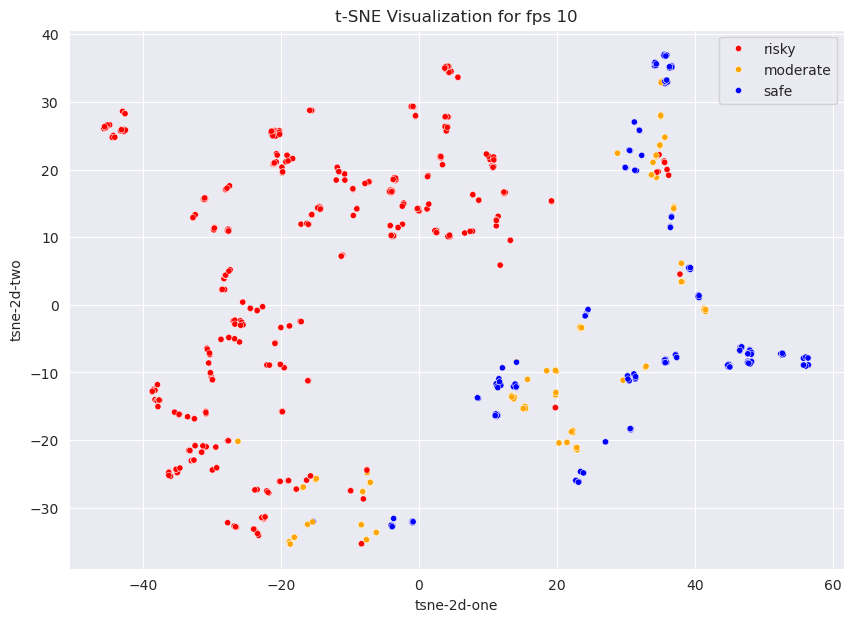

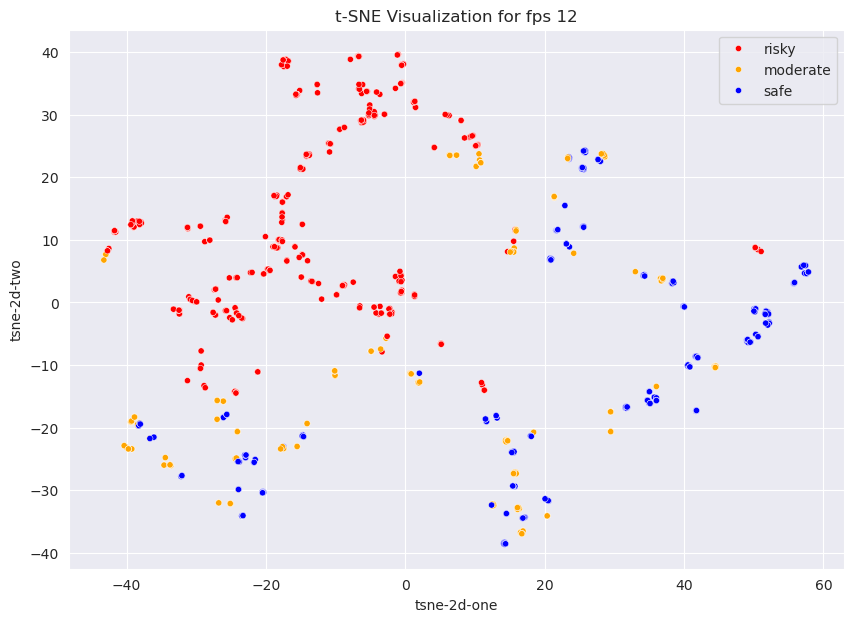

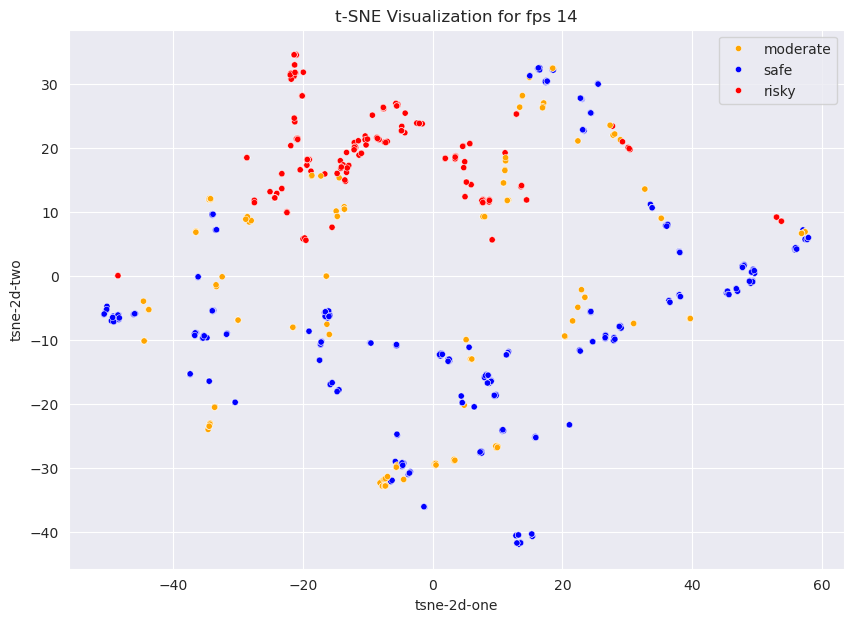

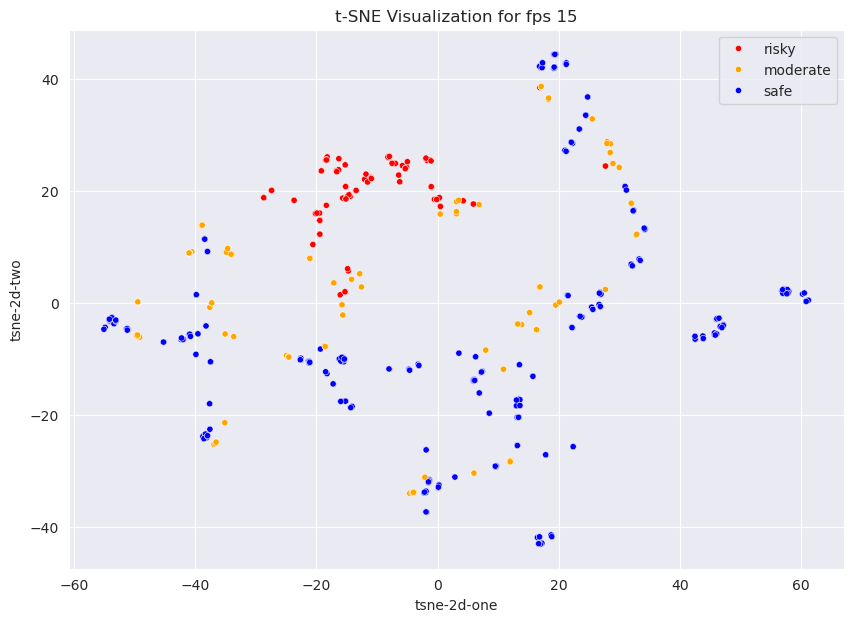

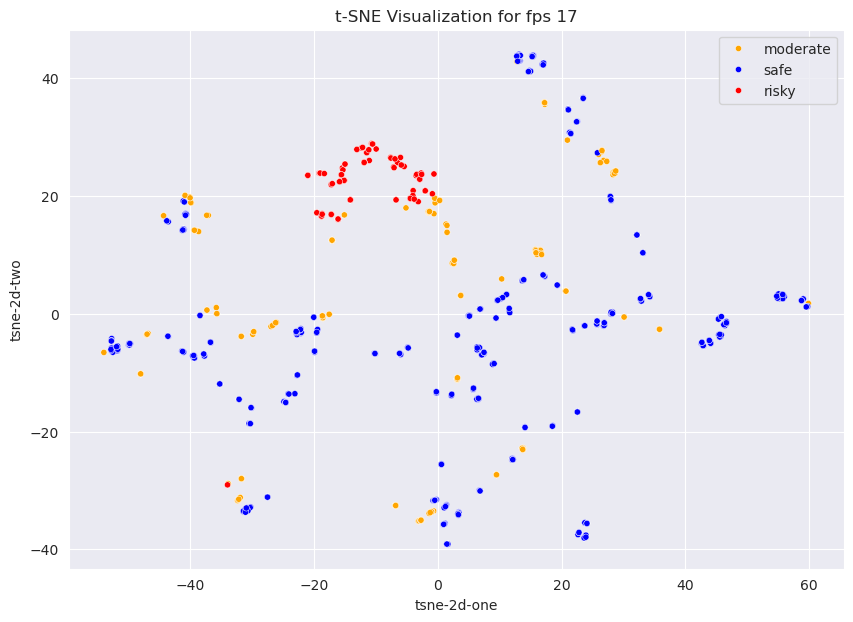

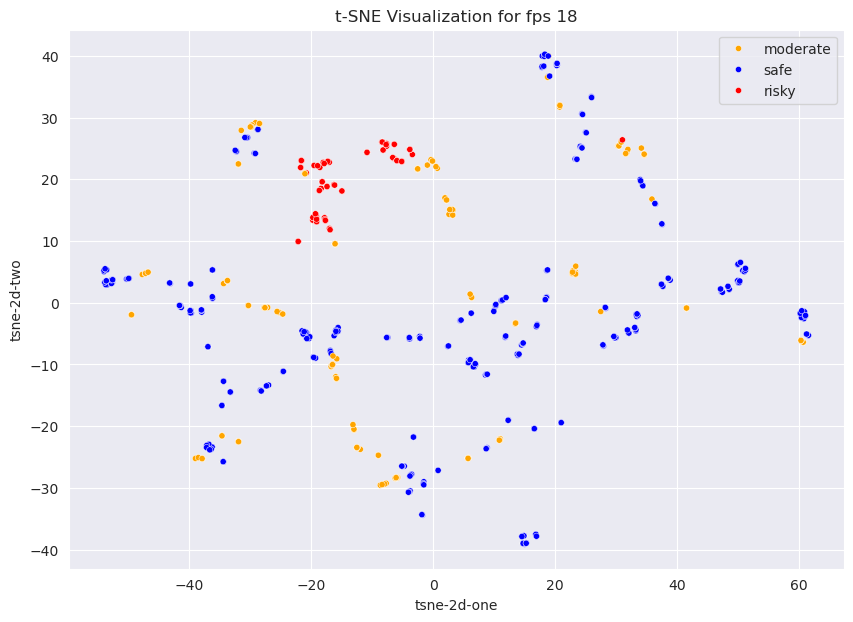

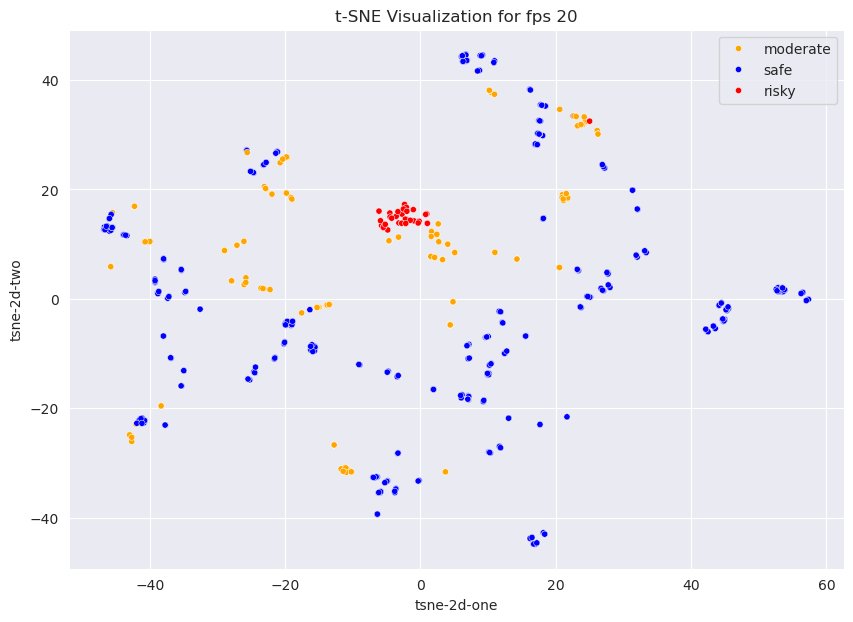

In [7]:
# t-SNE analysis on each fidelity, features involved are columns in data_numerical_{fps}

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

desired_fps = [10, 12, 14, 15, 17, 18, 20]

scaler = StandardScaler()

for fps in desired_fps:
    # Extract data for the current fps
    data_numerical_fps = data_numerical.xs(fps, level="fps", drop_level=False)

    # Extract labels
    labels = data.loc[data_numerical_fps.index, 'label'].values
    
    # Drop label column for scaling
    data_numerical_fps_num = data_numerical_fps.drop(columns=["label"])

    # Scale the data
    data_scaled = scaler.fit_transform(data_numerical_fps_num)
    data_scaled = pd.DataFrame(data_scaled)

    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(data_scaled)

    # Create a DataFrame with t-SNE results
    tsne_df = pd.DataFrame(tsne_results, columns=['tsne-2d-one', 'tsne-2d-two'])
    tsne_df['label'] = labels

    # Generate a list of colors from the colormap
    cmap = sns.color_palette("viridis", as_cmap=True)
    unique_labels = tsne_df['label'].unique()
    num_colors = len(unique_labels)
    colors = cmap(np.linspace(0, 1, num_colors))

    # Create a dictionary mapping labels to colors
    palette = dict(zip(unique_labels, colors))
    
    custom_palette = {
    'safe': 'blue',
    'moderate': 'orange',
    'risky': 'red'
}

    # Plotting
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x='tsne-2d-one', y='tsne-2d-two',
        hue='label',
        palette=custom_palette,
        data=tsne_df,
        legend="full",
        s=20
    )

    plt.title(f't-SNE Visualization for fps {fps}')
    plt.xlabel('tsne-2d-one')
    plt.ylabel('tsne-2d-two')
    plt.legend(loc='best')
    plt.show()

Below is the shapley additive explanations (SHAP) analysis, **random forest** is used for the classifier. For the summary plot, mean absolute shap value indicates how importance the feature to the model (no matter posi-/negative related to the output label)

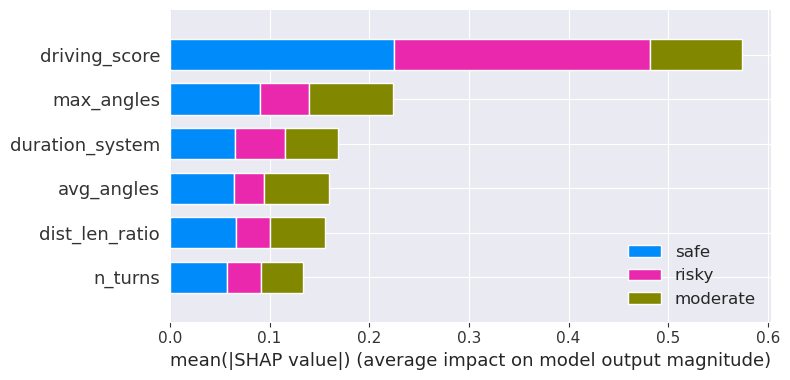

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap

# Assuming data_numerical is your DataFrame
# Extract the features and labels
X = data_numerical.drop(columns=['label','driving_score_error'])
y = data_numerical['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, class_names=model.classes_)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


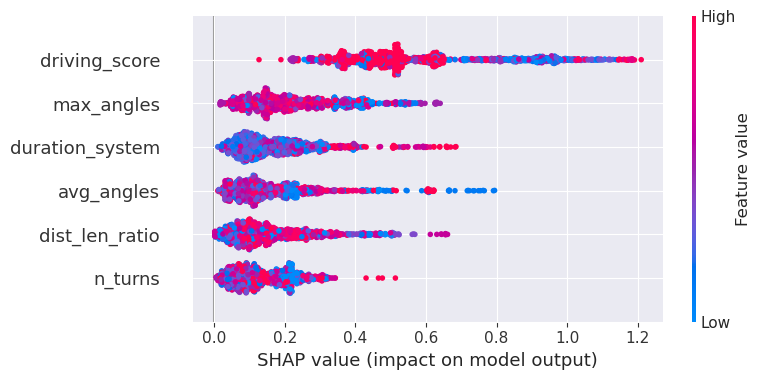

In [23]:
# Run the analysis across all classes

shap_values_combined = np.sum([np.abs(shap_value.values) for shap_value in shap_values], axis=2)
shap.summary_plot(shap_values_combined, X_test)


['moderate' 'risky' 'safe']
Generating SHAP summary plot for class: moderate


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


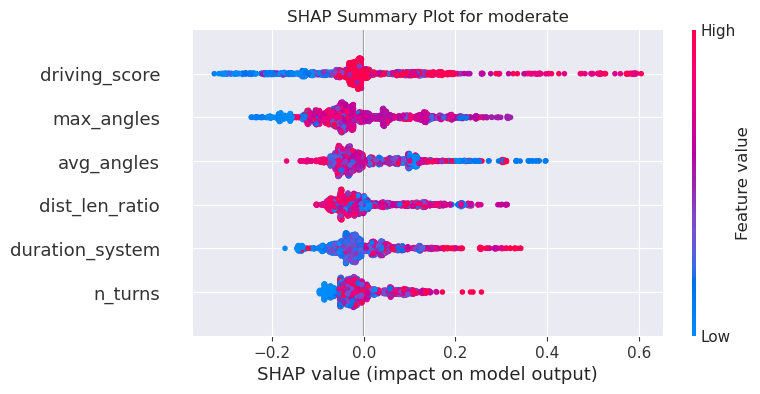

Generating SHAP summary plot for class: risky


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


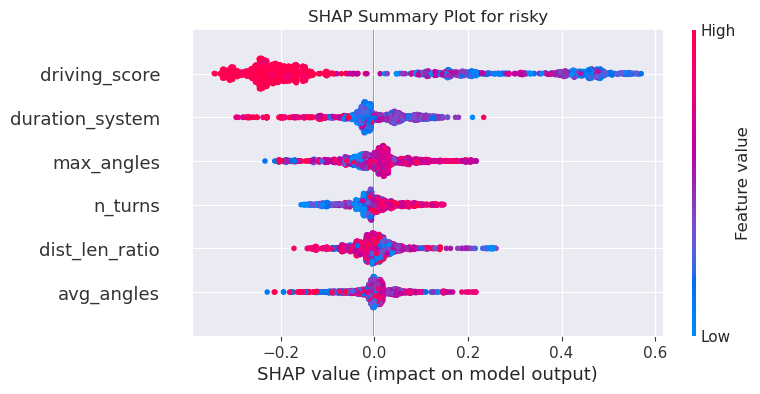

Generating SHAP summary plot for class: safe


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


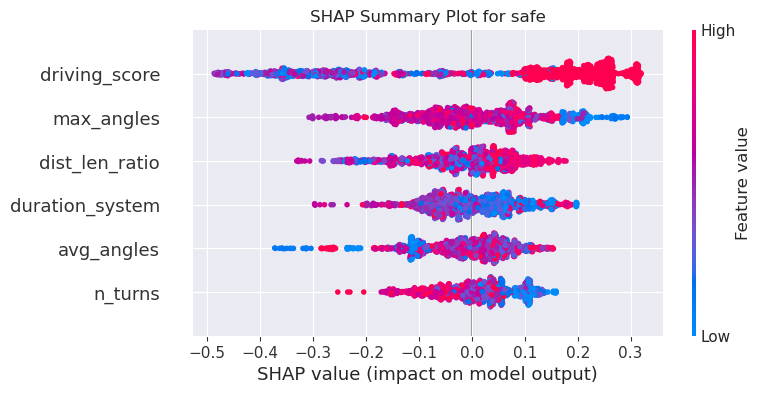

In [24]:
# explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)
class_labels = model.classes_
print(class_labels) 

# Summary plot
for i, class_label in enumerate(class_labels):
    print(f"Generating SHAP summary plot for class: {class_label}")
    shap.summary_plot(shap_values[:,:,i], X_test, show=False)
    plt.title(f"SHAP Summary Plot for {class_label}")
    plt.show()